In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

### 삼성전자 주식 정보 읽어오기

In [2]:
# 시작날짜
start = datetime.datetime(2010, 1, 1)
# 종료날짜
end = datetime.datetime(2020, 12, 31)

In [3]:
# 삼성전자 주식 데이터를 가져온다
slb = data.DataReader('005930.KS', 'yahoo', start, end)
slb

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13134.010742
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13345.065430
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13653.530273
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13198.952148
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13328.830078
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,71766.921875
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,75554.351562
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,76428.375000


In [4]:
# 파일로 저장한다.
slb.to_csv('data/ss_stock.csv')

### 저장한 정보를 읽어온다.

In [7]:
# 파일에서 데이터를 읽어온다.
cel = pd.read_csv('data/ss_stock.csv')
cel.set_index('Date', inplace=True)
cel

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13134.010742
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13345.065430
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13653.530273
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13198.952148
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13328.830078
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,71766.921875
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,75554.351562
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,76428.375000


In [10]:
# 인덱스의 데이터 타입을 확인한다.
# dtype을 확인한다.
cel.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
       '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30'],
      dtype='object', name='Date', length=2708)

In [11]:
# 컬럼들의 데이터 타입을 확인한다.
cel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 2010-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2708 non-null   float64
 1   Low        2708 non-null   float64
 2   Open       2708 non-null   float64
 3   Close      2708 non-null   float64
 4   Volume     2708 non-null   float64
 5   Adj Close  2708 non-null   float64
dtypes: float64(6)
memory usage: 148.1+ KB


In [13]:
# 인덱스를 날짜 타입으로 변경한다.
cel.index = pd.to_datetime(cel.index, format='%Y-%m-%d')
cel.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=2708, freq=None)

### 주식 데이터 확인

In [14]:
# 데이터 프래임의 요약정보 확인
cel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2708 entries, 2010-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2708 non-null   float64
 1   Low        2708 non-null   float64
 2   Open       2708 non-null   float64
 3   Close      2708 non-null   float64
 4   Volume     2708 non-null   float64
 5   Adj Close  2708 non-null   float64
dtypes: float64(6)
memory usage: 148.1 KB


In [15]:
# 결측치 확인
cel.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

### 일별 수익률 계산

In [18]:
# 이전 데이터와 값이 얼마나 차이가 나는가....
# cel['Close'].diff()

# 이전 보다 몇 퍼센트 정도 등락을 했는지..(-1 ~ 0 ~ 1)
cel_daily = cel['Close'].pct_change()
cel_daily

Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2020-12-23    0.022130
2020-12-24    0.052774
2020-12-28    0.011568
2020-12-29   -0.005083
2020-12-30    0.034483
Name: Close, Length: 2708, dtype: float64

In [19]:
# 수익률이 0 미만인 데이터의 수를 구한다.
# 주가가 떨어진것
a1 = cel_daily < 0
a1.sum()

1250

10년간 주식이 오른 날은 1250일이 된다.

### 종가에 대한 10%, 90% 위치를 살펴본다.

In [20]:
# 종가만 추출한다.
cel_close = cel['Close']
cel_close

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Name: Close, Length: 2708, dtype: float64

In [22]:
# 종가 금액의 요악 통계 정보를 사펴본다.
cel_des = cel_close.describe(percentiles=(0.1, 0.9))
cel_des

count     2708.000000
mean     33107.289513
std      13460.387890
min      13600.000000
10%      16860.000000
50%      28180.000000
90%      51900.000000
max      81000.000000
Name: Close, dtype: float64

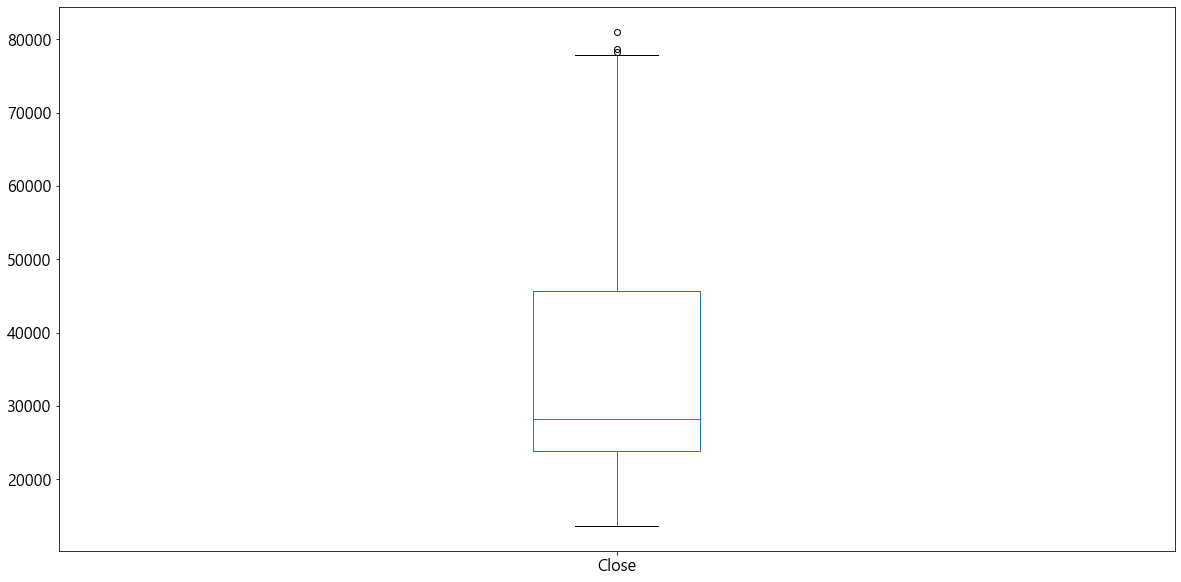

In [24]:
# 극단치 확인
cel_close.plot.box()
plt.show()

### 데이터 시각화

#### 종가 금액에 대한 그래프 색을 검정색으로 해서 그린다.
- x 축은 일자, y 축은 금액으로 처리한다.
- 데이터 프레임이나 시리즈의 인덱스가 x 축이 된다.

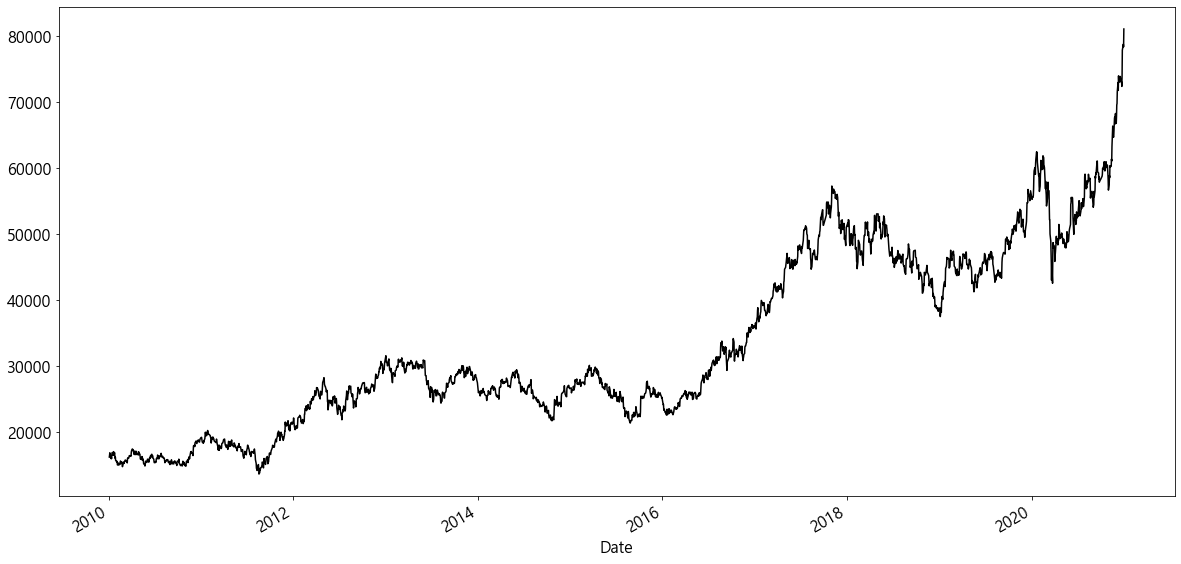

In [28]:
cel_close.plot(color='black')
plt.show()

#### 특정 범위를 벗어나는 그래프의 색을 다르게 표시한다.
- 하나의 별도 그래프를 그려서 별도의 모양과 색으로 처리한다.

In [29]:
# 요약통계 정보를 가져온다.
cel_des = cel_close.describe(percentiles=[0.1, 0.9])
cel_des

count     2708.000000
mean     33107.289513
std      13460.387890
min      13600.000000
10%      16860.000000
50%      28180.000000
90%      51900.000000
max      81000.000000
Name: Close, dtype: float64

In [33]:
# 10% 이하의 값들
# 요약 통계 정보에서 10% 위치 값을 가져온다.
a1 = cel_des.loc['10%']
# 10% 이하의 값들에 해당하는 것은 True로 되어 있는 결과를 가져온다.
a2 = cel_close <= a1
a2

Date
2010-01-04     True
2010-01-05     True
2010-01-06     True
2010-01-07     True
2010-01-08     True
              ...  
2020-12-23    False
2020-12-24    False
2020-12-28    False
2020-12-29    False
2020-12-30    False
Name: Close, Length: 2708, dtype: bool

In [34]:
# 90% 이상의 값들
# 요약 통계 정보에서 90% 위치 값을 가져온다.
a3 = cel_des.loc['90%']
# 90% 이상의 값들에 해당하는 것은 True로 되어 있는 결과를 가져온다.
a4 = cel_close >= a3
a4

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
              ...  
2020-12-23     True
2020-12-24     True
2020-12-28     True
2020-12-29     True
2020-12-30     True
Name: Close, Length: 2708, dtype: bool

In [37]:
# 위의 두 결과를 합친다. (or 연산을 한다.)
# or : |, 둘 중 하나라도 True면 결과를 True가 된다.
# and : &, 둘 중 하나라도 False면 결과를 False가 된다.
a5 = a2 | a4
a5

Date
2010-01-04    True
2010-01-05    True
2010-01-06    True
2010-01-07    True
2010-01-08    True
              ... 
2020-12-23    True
2020-12-24    True
2020-12-28    True
2020-12-29    True
2020-12-30    True
Name: Close, Length: 2708, dtype: bool

In [38]:
# 10% 이하, 90% 이상인 것들을 가져온다.
cel_top_bottom = cel_close[a5]
cel_top_bottom

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Name: Close, Length: 545, dtype: float64

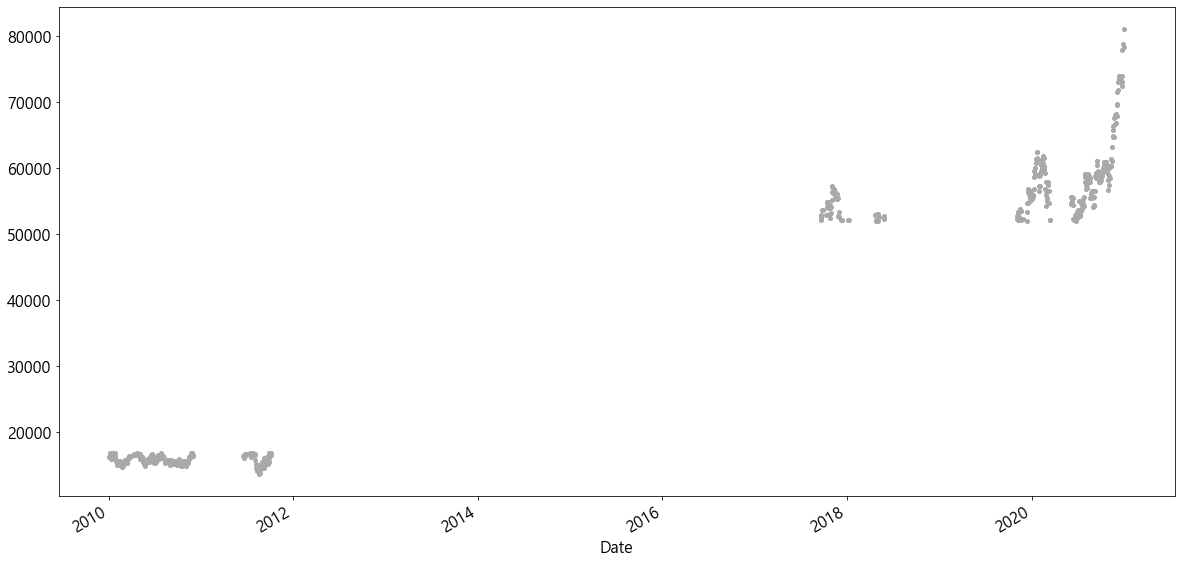

In [47]:
# 시각화
# style : 선의 모양. ' ' 를 주면 선의 모양은 빈칸이 된다.
# marker : 값 위치에 표시할 모양, o는 점
# ms : 마커의 크기
# color : 색상
cel_top_bottom.plot(style=' ', marker='o', ms=4, color='darkgray')
plt.show()

#### 그래프 내에 강조 선 그리기
- 상위(90%), 하위(10%) 선을 그린다.

In [48]:
# 10% 이하의 값들
a1 = cel_close <= cel_des.loc['10%']
# 90% 이상의 값들
a2 = cel_close >= cel_des.loc['90%']

criteria = a1 | a2
criteria

Date
2010-01-04    True
2010-01-05    True
2010-01-06    True
2010-01-07    True
2010-01-08    True
              ... 
2020-12-23    True
2020-12-24    True
2020-12-28    True
2020-12-29    True
2020-12-30    True
Name: Close, Length: 2708, dtype: bool

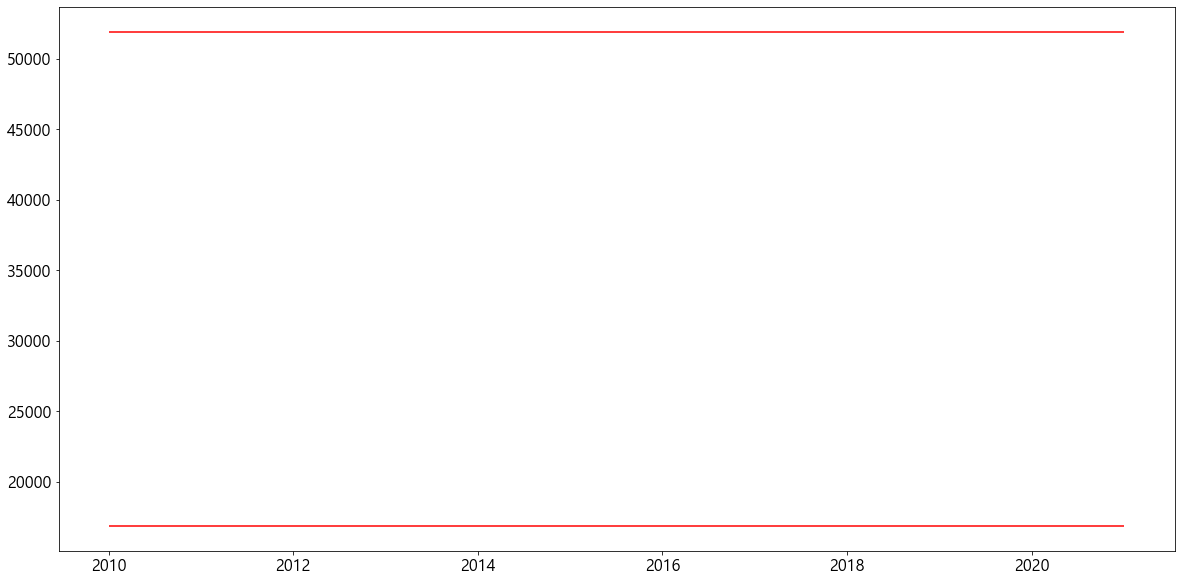

In [54]:
# 선을 그리기 위해 y 축을 10%, 90%의 위치로 지정하고 x 축은 시작점과
# 종료점으로 셋팅한다.
# 10% 위치값
value_10 = cel_des.loc['10%']
# 90% 위치값
value_90 = cel_des.loc['90%']

# 제일 작은 날짜값
index_min = criteria.index[0]
# 제일 큰 날짜값
index_max = criteria.index[-1]

plt.hlines(y = [value_10, value_90], xmin=index_min, xmax=index_max, 
          color='red')
plt.show()

#### 지금까지 살펴본 3가지 그래프를 한번에 그린다.

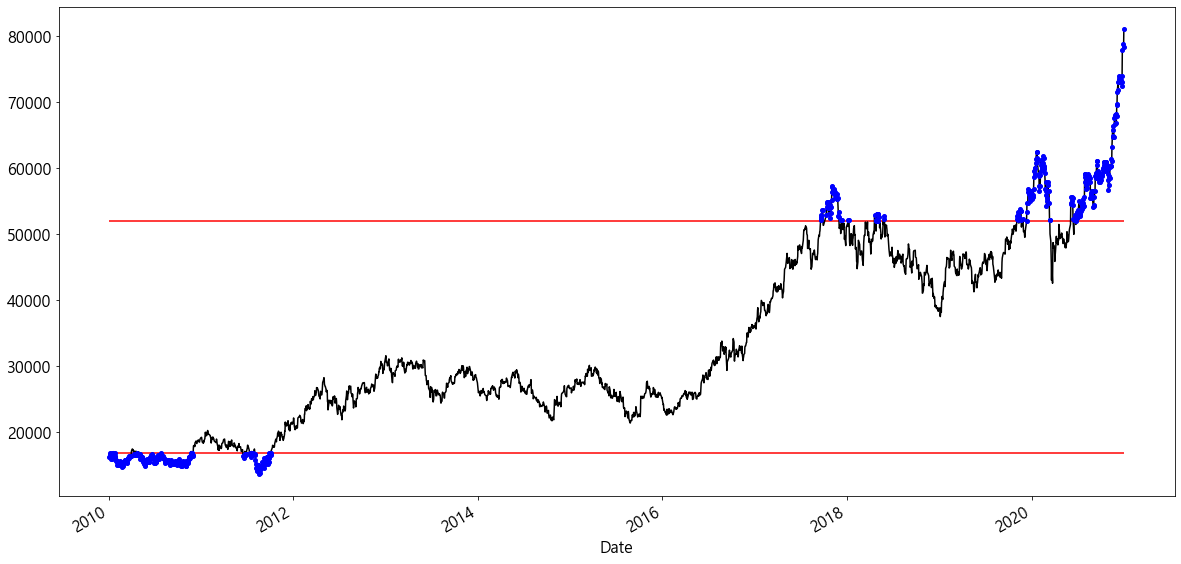

In [60]:
# 종가 전체 그래프
cel_close.plot(color='black')

# 상위 90% 이상, 하위 10% 이하에 점을 찍는다.
cel_top_bottom.plot(style=' ', marker='o', ms=4, color='blue')

# 상위 90% 위치, 하위 10% 위치에 강조선을 긋는다.
plt.hlines(y = [value_10, value_90], xmin=index_min, xmax=index_max, 
          color='red')
plt.show()

### 수익률 비교

In [61]:
cel['Close'].head()

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
Name: Close, dtype: float64

In [63]:
(cel['Close'][1] - cel['Close'][0]) / cel['Close'][0]

0.016069221260815822

In [65]:
# pct_change : 현재 원소와 이전 원소간의 % 변화율 계산
cel_pct_change = cel['Close'].pct_change()
cel_pct_change

Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2020-12-23    0.022130
2020-12-24    0.052774
2020-12-28    0.011568
2020-12-29   -0.005083
2020-12-30    0.034483
Name: Close, Length: 2708, dtype: float64

### 결측치 처리

In [66]:
# 첫 번째 날은 이전 날이 없기 때문에 결과가 결측치로 되어 있다.
cel_pct_change.isna().sum()

1

In [68]:
# 제거한다.
cel_pct_change.dropna(inplace=True)
cel_pct_change.isna().sum()

0

### 수익률에 대한 히스토그램
- x 축 : 지정된 값의 최소와 최대값으로 설정된다.
- y 축 : 각 값 종류별로 개수로 지정된다.
- 중앙값을 기준으로 좌측(작은값)과 우측(큰값)의 개수가 어느정도 되는지 비교한다.

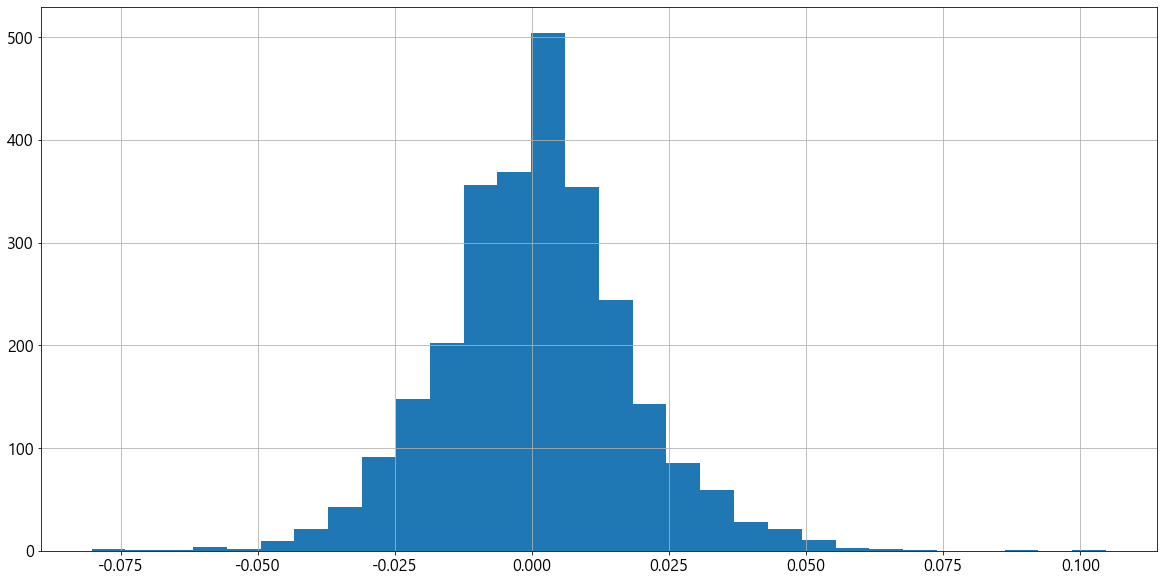

In [74]:
# bins : 히스토그램에서 사용하는 막대의 개수
cel_pct_change.hist(bins=30)
plt.show()

### 통계량

#### 첨도(Kurtosis)
- 첨도는 분포의 꼬리부분의 길이와 중와 부분의 표족함에 대한 정보를 제공하는 통계량
- 첨도가 0보다 크면 긴 꼬리를 갖고 분포가 중앙 부분에 덜 분포 되어 있는것으로 해석한다

In [75]:
cel_daily.kurt()

1.5544292402894202

#### 왜도
- 분포의 비대칭 정도를 나타내는 값
- 분포가 완전 대칭인 경우에는 왜도가 0이다.
- 왼쪽으로 긴 꼬리를 가지면 음수이고, 오른쪽으로 긴 꼬리를 가지면 양수
- 비대칭 정도가 심할 수록 왜도의 절대값이 증가한다.

In [76]:
cel_daily.skew()

0.1538558051136132